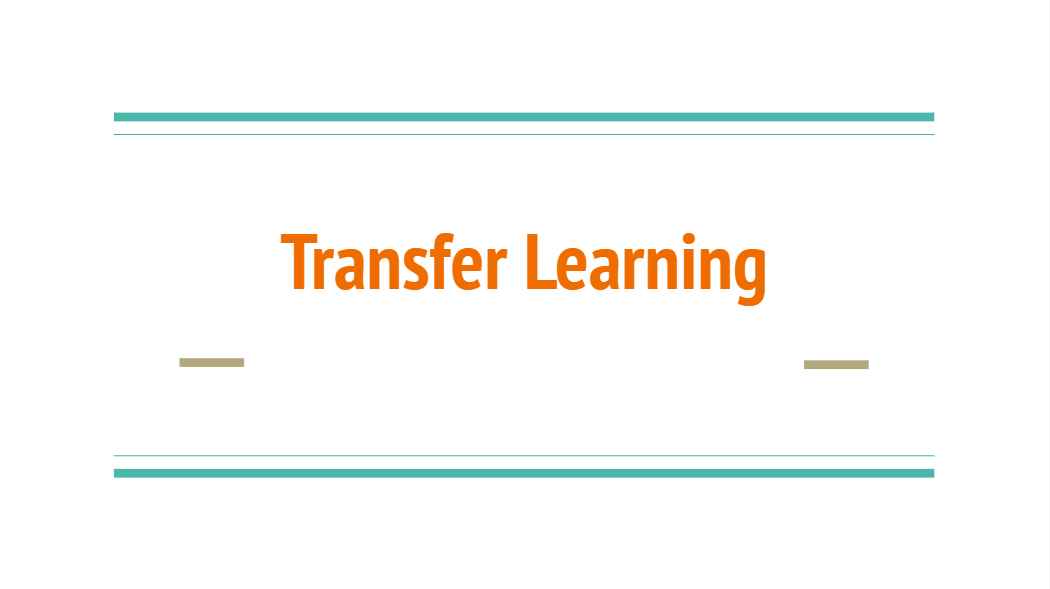

## Bibliotecas

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

## Introdução

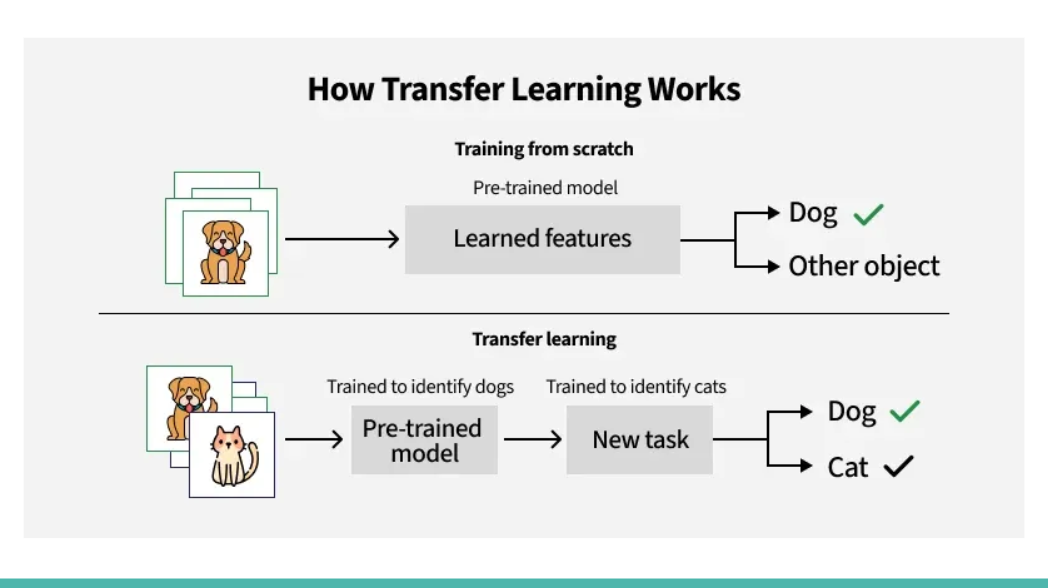

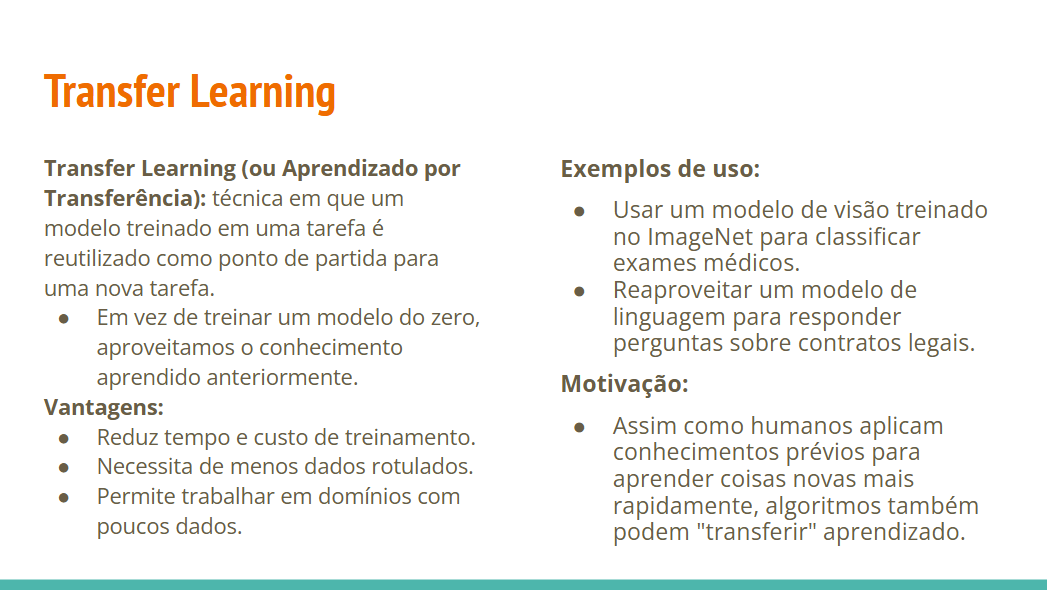

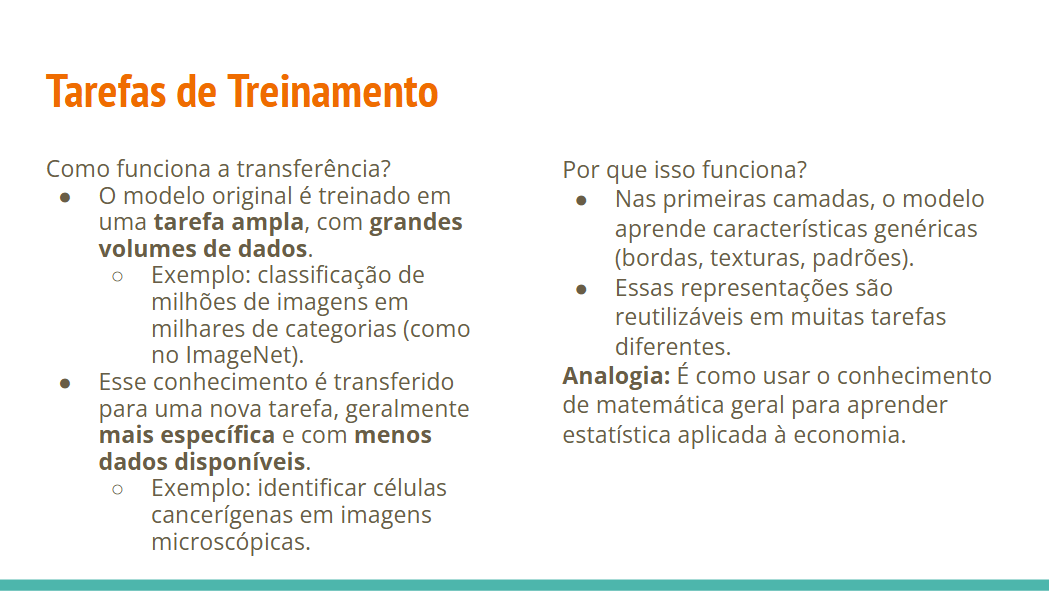

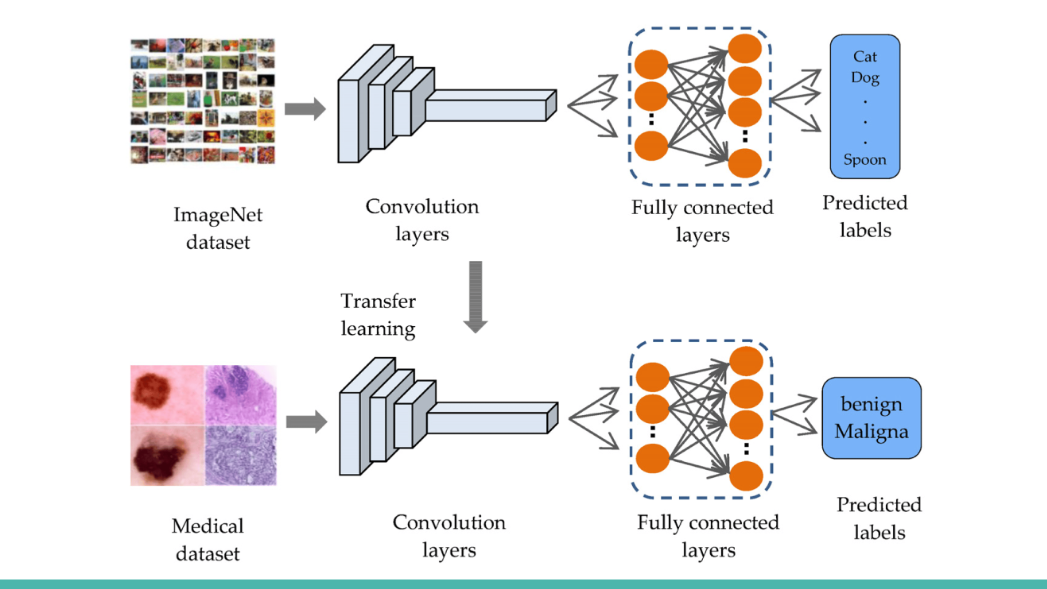

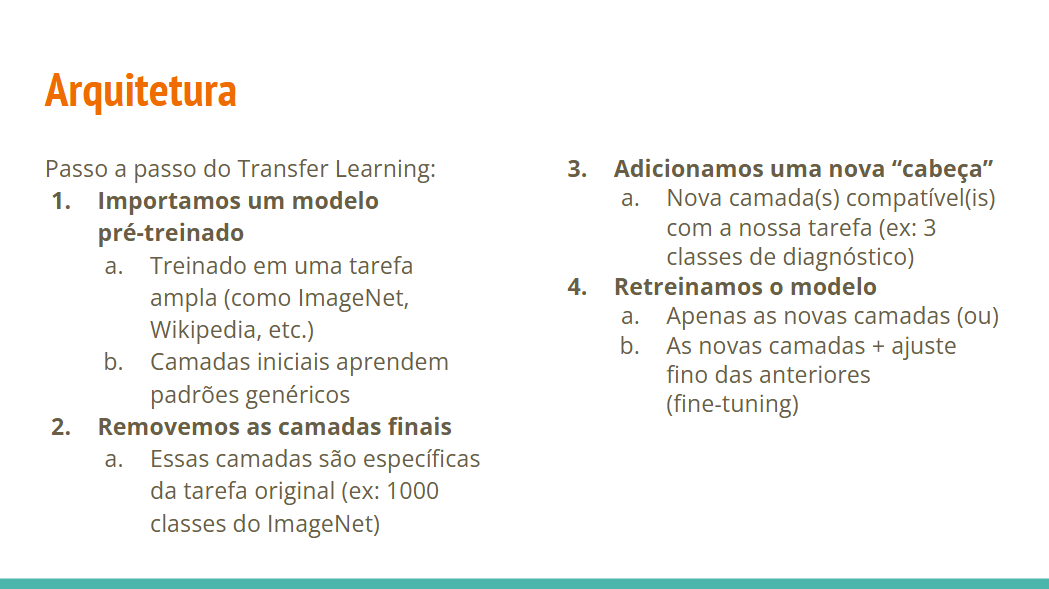

## ImageNet

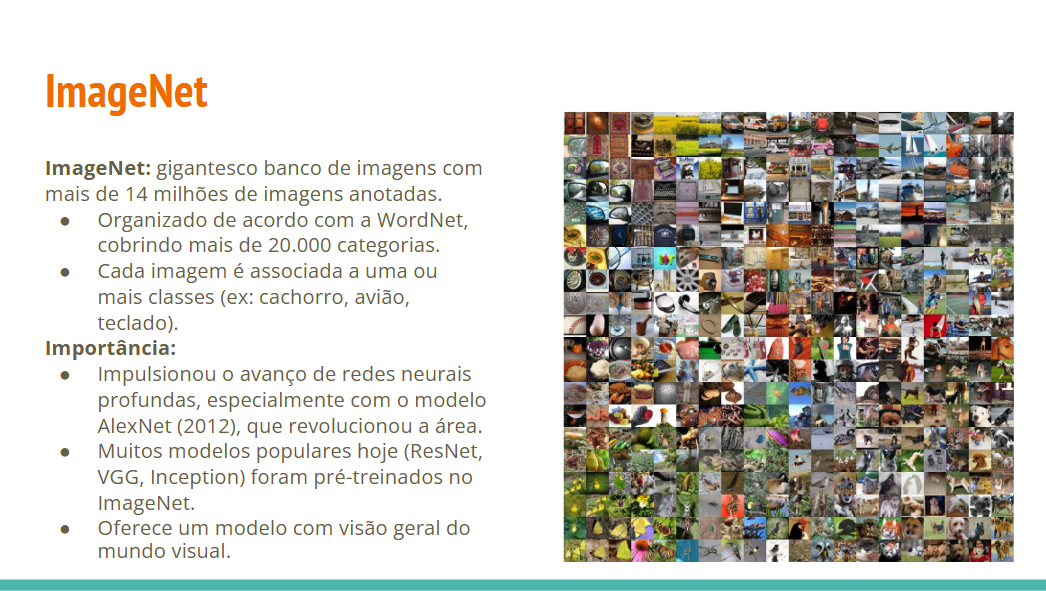

## AlexNet

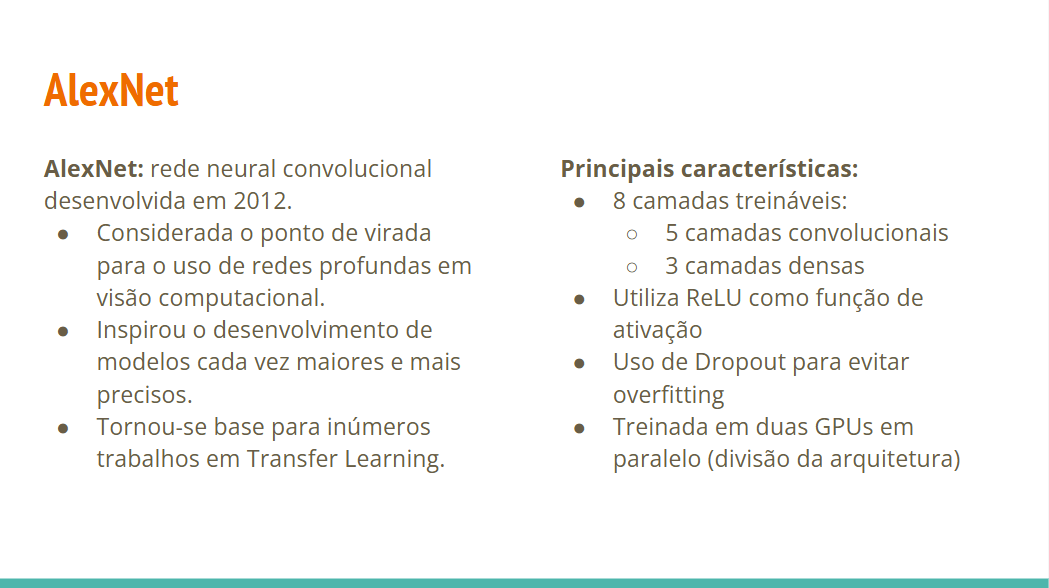

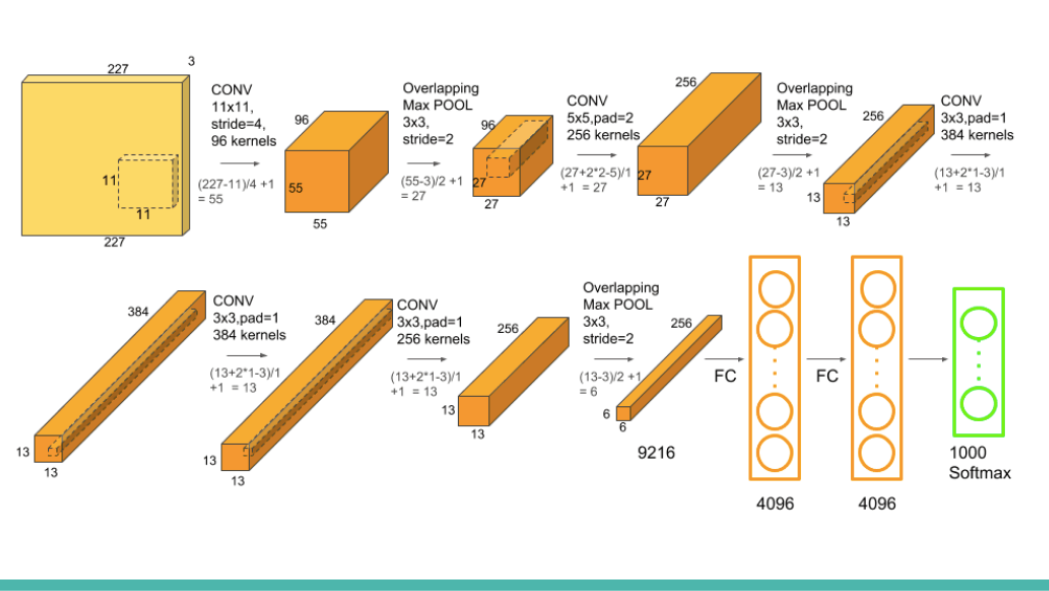

## Fine-Tuning

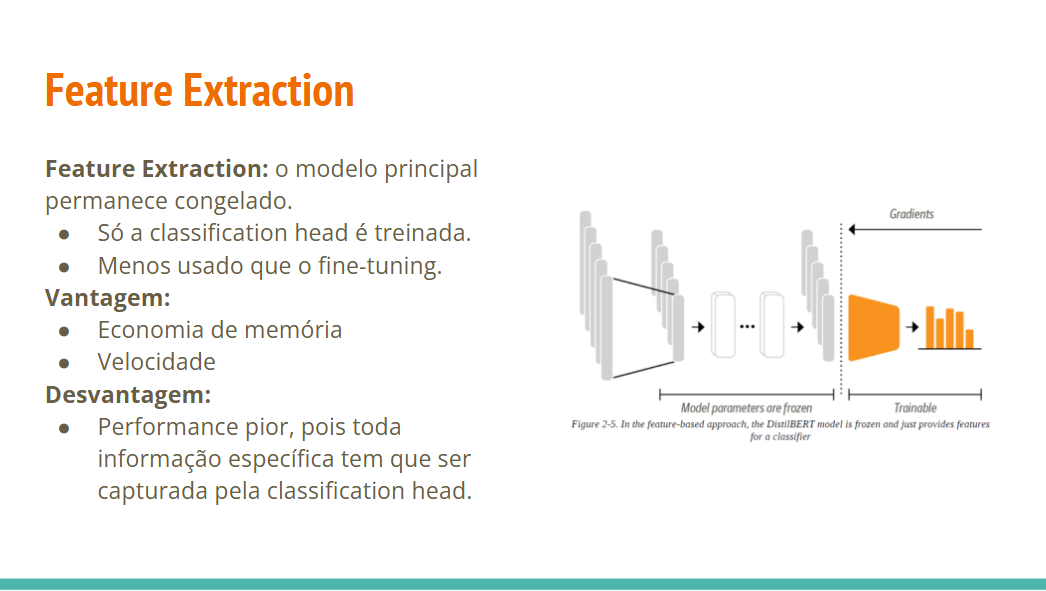

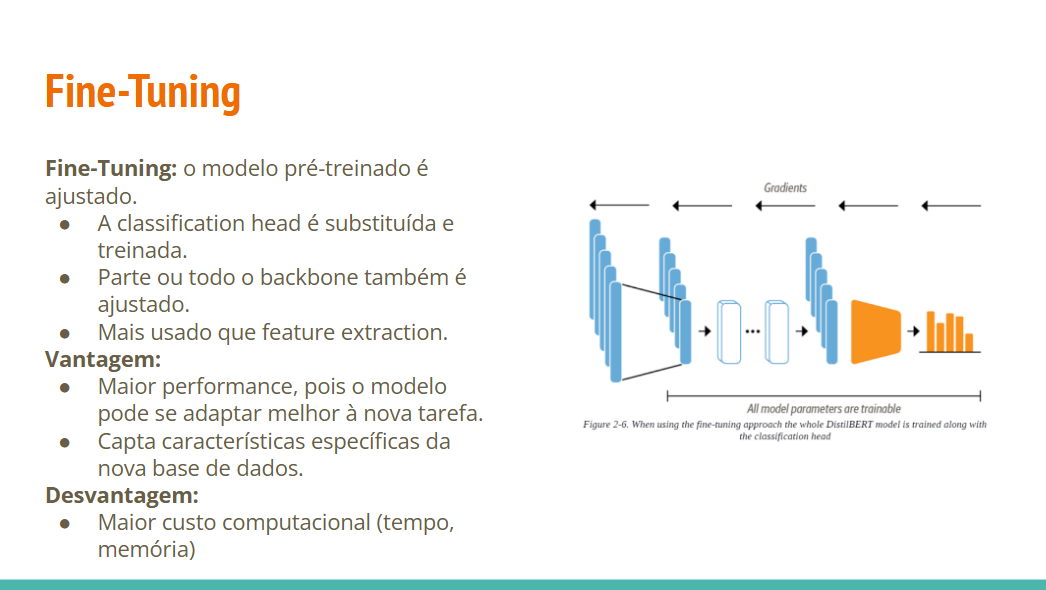

## Aplicação
### Objetivo

Neste exercício, você irá treinar dois modelos para classificar imagens usando:

- Uma **rede neural densa**
- Uma **rede neural convolucional**

Você deve comparar o desempenho das duas abordagens em termos de acurácia, tempo de treino e generalização no conjunto de teste.

---

### Dataset: Binary Cats vs Dogs

Utilizaremos um subconjunto do dataset **Cats vs Dogs** disponível no [TensorFlow Datasets (`tfds`)](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs).

Esse dataset contém imagens coloridas de **gatos** e **cachorros**, com apenas **2 classes**:
- 0 → Gato
- 1 → Cachorro

---

### Tarefas

1. Carregar o dataset `cats_vs_dogs` via `tensorflow_datasets`.
2. Redimensinoar as imagens redimensionadas para um tamanho fixo, como `64x64`.
3. Dividir o conjunto de dados em treino (80%) e teste (20%).
4. Construir um **modelo denso**
5. Construir uma **rede convolucional**
6. Avaliar os modelos no conjunto de teste
7. Comparar:
   - Perda
   - Acurácia
8. Mostrar 5 imagens corretamente e 5 incorretamente classificadas por cada modelo

---

### Dicas

- Use `tfds.load('cats_vs_dogs', as_supervised=True)` para carregar o dataset.
- Use `tf.image.resize(image, [64, 64])` para redimensionar as imagens.

---

### Desafio Extra

- Implemente **EarlyStopping** para interromper o treinamento se a validação parar de melhorar.

In [2]:
# Carregar o dataset
ds_train, ds_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True
)

In [3]:
# Pré-processamento
image_size = 224
batch_size = 128

def preprocess(image, label):
    image = tf.image.resize(image, [image_size, image_size])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)

#### Rede Densa

In [12]:
# Modelo Denso
mlp_model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # saída binária
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,136,641 (294.25 MB)

 Trainable params: 77,136,641 (294.25 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilação
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [15]:
# Treinamento
mlp_model.fit(ds_train,
              validation_data=ds_test,
              epochs=10)

Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.5066 - loss: 15.9788 - val_accuracy: 0.4899 - val_loss: 0.6924
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 0.4970 - loss: 0.6926 - val_accuracy: 0.5430 - val_loss: 0.6899
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.5093 - loss: 0.6922 - val_accuracy: 0.4899 - val_loss: 0.6932
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.4901 - val_loss: 0.6932
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 30s 203ms/step - accuracy: 0.5095 - loss: 0.6930 - val_accuracy: 0.4899 - val_loss: 0.6931
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.5085 - loss: 0.6926 - val_accuracy: 0.4901 - val_loss: 0.6932
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 235ms/step - accuracy: 0.5144 - loss: 0.6932 - val_accuracy: 0.4899 - val_loss: 0.6931
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.5048 - loss: 

In [16]:
# Avaliação
mlp_eval = mlp_model.evaluate(ds_test)

print(f"MLP - Acurácia: {mlp_eval[1]:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.4886 - loss: 0.6933
MLP - Acurácia: 0.4901


#### Rede Convolucional

In [5]:
# Modelo Convolucional
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,709,761 (98.07 MB)

 Trainable params: 25,709,761 (98.07 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilação
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [8]:
# Treinamento
cnn_model.fit(ds_train,
              validation_data=ds_test,
              epochs=10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 61s 540ms/step - accuracy: 0.5021 - loss: 2.2972 - val_accuracy: 0.5346 - val_loss: 0.6900
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 35s 481ms/step - accuracy: 0.6171 - loss: 0.6579 - val_accuracy: 0.6253 - val_loss: 0.6444
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 485ms/step - accuracy: 0.6681 - loss: 0.6056 - val_accuracy: 0.6599 - val_loss: 0.6043
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 417ms/step - accuracy: 0.7162 - loss: 0.5570 - val_accuracy: 0.6872 - val_loss: 0.5825
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 35s 482ms/step - accuracy: 0.7447 - loss: 0.5093 - val_accuracy: 0.7173 - val_loss: 0.5492
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 35s 482ms/step - accuracy: 0.7788 - loss: 0.4660 - val_accuracy: 0.7453 - val_loss: 0.5162
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 415ms/step - accuracy: 0.8143 - loss: 0.4093 - val_accuracy: 0.7539 - val_loss: 0.5232
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - accuracy: 0.8272 - loss: 0.3787 - val_accu

In [9]:
# Avaliação
cnn_eval = cnn_model.evaluate(ds_test)

print(f"CNN - Acurácia: {cnn_eval[1]:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.7514 - loss: 0.5717
CNN - Acurácia: 0.7549


#### Transfer Learning

O modelo **AlexNet** não está disponível diretamente em Keras. Assim, vamos usar um outro modelo de base, chamado **MobileNet**.

**MobileNet** é uma rede neural leve e eficiente, projetada para dispositivos com recursos limitados. Ela utiliza *depthwise separable convolutions* para reduzir drasticamente o número de parâmetros e o custo computacional, mantendo boa performance em tarefas de visão computacional.

**Depthwise separable convolutions** são uma técnica usada para tornar convoluções muito mais eficientes, especialmente em redes como a MobileNet.

1. **Depthwise convolution:** Aplica um filtro por canal (por exemplo, um filtro diferente para R, G e B separadamente), sem combinar canais. Isso extrai características espaciais por canal individualmente.

2. **Pointwise convolution:**  Usa filtros 1x1 para combinar as informações entre os canais, aprendendo relações entre canais (como faz uma convolução padrão).










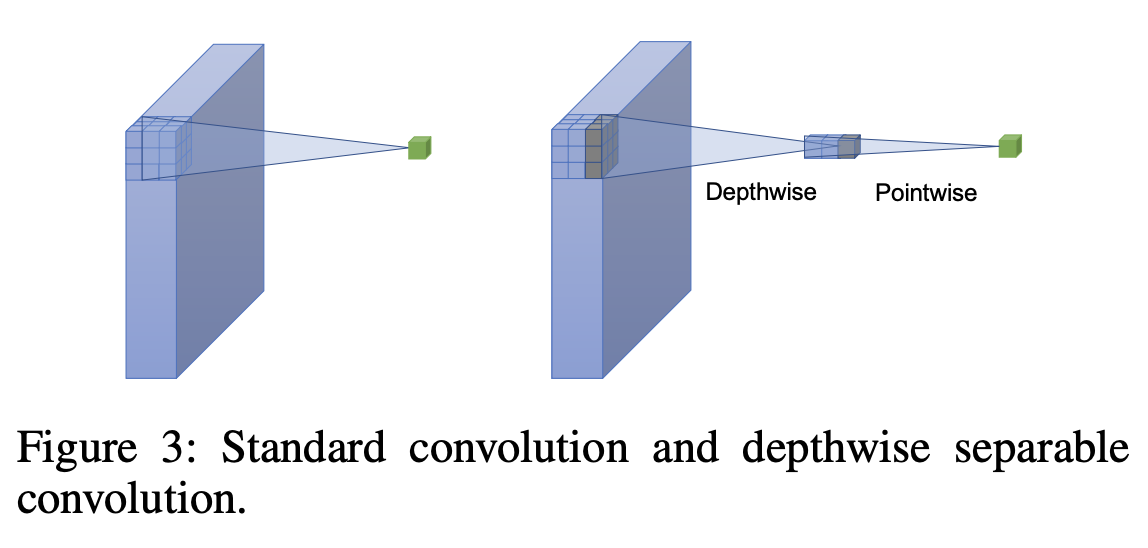

In [8]:
# Definir entrada
inputs = Input(shape=(224, 224, 3))

# Modelo base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)
base_model.trainable = False  # Só feature extraction

# Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Modelo final
mobilenet_model = Model(inputs=inputs, outputs=outputs)

<ipython-input-8-56a639d54d4a>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
mobilenet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 23,796,993 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [9]:
# Compilação
mobilenet_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [10]:
# Treinamento
mobilenet_model.fit(ds_train,
              validation_data=ds_test,
              epochs=10)

Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9485 - loss: 0.1243 - val_accuracy: 0.9845 - val_loss: 0.0415
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 61s 217ms/step - accuracy: 0.9817 - loss: 0.0504 - val_accuracy: 0.9854 - val_loss: 0.0430
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.9827 - loss: 0.0464 - val_accuracy: 0.9862 - val_loss: 0.0381
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 38s 261ms/step - accuracy: 0.9851 - loss: 0.0405 - val_accuracy: 0.9841 - val_loss: 0.0422
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 45s 289ms/step - accuracy: 0.9853 - loss: 0.0360 - val_accuracy: 0.9850 - val_loss: 0.0389
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 74s 236ms/step - accuracy: 0.9874 - loss: 0.0330 - val_accuracy: 0.9854 - val_loss: 0.0394
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.9882 - loss: 0.0309 - val_accuracy: 0.9867 - val_loss: 0.0380
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 249ms/step - accuracy: 0.9900 - loss: 0

In [11]:
# Avaliação
transfer_eval = mobilenet_model.evaluate(ds_test)

print(f"MobileNet Fine-tuned - Acurácia: {transfer_eval[1]:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.9859 - loss: 0.0382
MobileNet Fine-tuned - Acurácia: 0.9862


## Exercício: Classificação de imagens de flores

### Objetivo

Neste exercício, você irá treinar **três modelos diferentes** para classificar imagens de flores em 5 categorias. O objetivo é comparar o desempenho, o tempo de treino e o comportamento de cada modelo:

- Uma **rede densa (MLP)**
- Uma **rede convolucional (CNN)**
- Um **modelo com Transfer Learning**

---

### Dataset: `tf_flowers`

- 5 classes de flores: *daisy, dandelion, roses, sunflowers, tulips*
- Aproximadamente 3.700 imagens coloridas
- Disponível via `tensorflow_datasets`

```python
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)
```

---

### Pré-processamento sugerido

- Redimensionar as imagens para `224x224`
- Normalizar os pixels: dividir os valores por 255.0

---

### Parte 1 – Rede Densa (MLP)

- Achatar a imagem com `Flatten`
- Conectar a camadas densas (`Dense`) com ativação `ReLU`
- Utilizar `Dropout` para regularização
- A camada de saída deve ter 5 neurônios com `Softmax` (classificação multiclasse)

---

### Parte 2 – Rede Convolucional (CNN)

- Utilizar camadas `Conv2D`, seguidas de `MaxPooling2D` e `Dropout`
- Finalizar com `Flatten` + `Dense` + `Softmax`

---

### Parte 3 – Modelo com Transfer Learning

- Utilizar `MobileNetV2` ou `ResNet50` como base pré-treinada (com `include_top=False`)
- Conectar a uma nova *classification head* com `Dense`, `Dropout` e `Softmax`

---

### Resultados esperados

Compare os modelos com base em:

- Acurácia no treino e teste
- Tempo de treinamento
- Comportamento de overfitting

---

### Extras

- Visualizar previsões corretas e incorretas
- Testar diferentes taxas de aprendizado
- Criar gráficos de treino (loss e accuracy)


In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pandas as pd

In [18]:
# Carregar o dataset
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.WZLDYJ_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [19]:
# Parâmetros
image_size = 224
batch_size = 32
num_classes = ds_info.features['label'].num_classes

# Pré-processamento
def preprocess(image, label):
    image = tf.image.resize(image, [image_size, image_size])
    image = preprocess_input(image)  # compatível com MobileNetV2
    return image, tf.one_hot(label, depth=num_classes)

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [21]:
# Função para compilar, treinar e avaliar modelos
def train_and_evaluate(model, name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(ds_train, validation_data=ds_test, epochs=5)
    return model, history

In [22]:
# Modelo Denso
mlp_model = models.Sequential([
    layers.Flatten(input_shape=(image_size, image_size, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Treinar o modelo
mlp_model, mlp_history = train_and_evaluate(mlp_model, "MLP")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.2850 - loss: 34.4122 - val_accuracy: 0.2970 - val_loss: 3.3915
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.2584 - loss: 3.9140 - val_accuracy: 0.2234 - val_loss: 1.8886
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2681 - loss: 2.1615 - val_accuracy: 0.2289 - val_loss: 1.9164
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2693 - loss: 2.0132 - val_accuracy: 0.2248 - val_loss: 1.7700
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2735 - loss: 1.6925 - val_accuracy: 0.2302 - val_loss: 1.7676


In [23]:
# Modelo CNN
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Treinar o modelo
cnn_model, cnn_history = train_and_evaluate(cnn_model, "CNN")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.2839 - loss: 6.5433 - val_accuracy: 0.4973 - val_loss: 1.2489
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5051 - loss: 1.2043 - val_accuracy: 0.5708 - val_loss: 1.1192
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5610 - loss: 1.0708 - val_accuracy: 0.5954 - val_loss: 1.0956
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6141 - loss: 0.9895 - val_accuracy: 0.6049 - val_loss: 1.0611
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6597 - loss: 0.8586 - val_accuracy: 0.5995 - val_loss: 1.0134


In [24]:
# Modelo com Transfer Learning (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

tl_model = models.Model(inputs=base_model.input, outputs=outputs)

# Treinar o modelo
tl_model, tl_history = train_and_evaluate(tl_model, "Transfer Learning")

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 212ms/step - accuracy: 0.6126 - loss: 1.0077 - val_accuracy: 0.8910 - val_loss: 0.3295
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.8642 - loss: 0.3839 - val_accuracy: 0.8978 - val_loss: 0.2965
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8834 - loss: 0.3190 - val_accuracy: 0.8815 - val_loss: 0.2900
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9068 - loss: 0.2616 - val_accuracy: 0.8815 - val_loss: 0.2844
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9209 - loss: 0.2346 - val_accuracy: 0.8965 - val_loss: 0.2647


In [26]:
# Coletar resultados
results = {
    "MLP - Test Accuracy": mlp_model.evaluate(ds_test, verbose=0)[1],
    "CNN - Test Accuracy": cnn_model.evaluate(ds_test, verbose=0)[1],
    "Transfer Learning - Test Accuracy": tl_model.evaluate(ds_test, verbose=0)[1]
}

In [27]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy"])

print(df_results)

                                   Accuracy
MLP - Test Accuracy                0.230245
CNN - Test Accuracy                0.599455
Transfer Learning - Test Accuracy  0.896458
